## <h1 style="text-align:center; background-color:#00008B; color: #FFFFFF; font-size:44px; font-weight:bold;"> </style> Apartment Rental Prediction</h1>

---

**Name:** Althaf N

**Organization:** Entri Elevate

---

## 1. Overview of Problem Statement

Accurate apartment rental price prediction is essential for both tenants and property managers.

### Importance:
- **For tenants**: Helps in budgeting and decision-making.
- **For property managers**: Assists in setting competitive rental prices.
- **For the market**: Enhances transparency and efficiency.

## 2. Objective

The goal is to develop a reliable machine learning model for predicting rental prices.

### Key Objectives:
- **Build multiple regression models** to predict rental prices.
- **Evaluate models using appropriate performance metrics**.
- **Select the best-performing model** for accurate predictions.

## 3. Data Description

### Dataset Source:
- **UCI Machine Learning Repository**

### Key Features taken:
- **Square Feet**: Total area of the apartment.
- **Bathrooms**: Number of bathrooms.
- **Bedrooms**: Number of bedrooms.
- **Latitude & Longitude**: Location-based features.
- **Price**: The target variable representing the rental price.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier


**Data Collection**
1. Importing the Dataset

Load the dataset from the specified source (CSV, Excel, Database, or API).
2. Understanding Data Distribution

Gain insights into the data distribution, relationships, and potential patterns.


In [7]:
# Load dataset
df = pd.read_csv('apartment_for_rent .csv')
print(df.shape)
df.head()

(99826, 21)


,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,Cats,...,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,"Cats,Dogs",...,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,NaN,...,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,"Cats,Dogs",...,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,"Cats,Dogs",...,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09


In [8]:
df.tail()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
99821,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,NaN,...,780,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1.544186e+09
99822,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,"Cats,Dogs",...,813,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1.544186e+09
99823,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,"Cats,Dogs",...,1325,Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1.544186e+09
99824,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,"Cats,Dogs",...,931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1.544186e+09
99825,housing/rent/apartment,Large Remodeled Two BR 1. Five BA Apartment Home,This is a brand new 2 Beds 1. five Bathrooms A...,"Gated,Parking,Wood Floors",1.5,2.0,USD,No,Yes,NaN,...,1595,Monthly,900,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1.544186e+09


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99826 entries, 0 to 99825
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       99826 non-null  object 
 1   title          99826 non-null  object 
 2   body           99826 non-null  object 
 3   amenities      83749 non-null  object 
 4   bathrooms      99760 non-null  object 
 5   bedrooms       99699 non-null  object 
 6   currency       99822 non-null  object 
 7   fee            99823 non-null  object 
 8   has_photo      99823 non-null  object 
 9   pets_allowed   39192 non-null  object 
 10  price          99821 non-null  float64
 11  price_display  99820 non-null  object 
 12  price_type     99823 non-null  object 
 13  square_feet    99823 non-null  object 
 14  address        7946 non-null   object 
 15  cityname       99521 non-null  object 
 16  state          99521 non-null  object 
 17  latitude       99797 non-null  float64
 18  longit

In [10]:
# Display the data types of each column in the DataFrame
df.dtypes

category          object
title             object
body              object
amenities         object
bathrooms         object
bedrooms          object
currency          object
fee               object
has_photo         object
pets_allowed      object
price            float64
price_display     object
price_type        object
square_feet       object
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time             float64
dtype: object

In [11]:
# Check for missing values
df.isnull().sum()

category             0
title                0
body                 0
amenities        16077
bathrooms           66
bedrooms           127
currency             4
fee                  3
has_photo            3
pets_allowed     60634
price                5
price_display        6
price_type           3
square_feet          3
address          91880
cityname           305
state              305
latitude            29
longitude           31
source               6
time                 6
dtype: int64

In [12]:
# Display the list of column names in the DataFrame
df.columns

Index(['category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

## 4. Data Preprocessing

Cleaning and preparing data for better model performance.

### Steps:
1. **Handle Missing Values**: Use mean/median imputation.
2. **Outlier Detection & Removal**: Identify anomalies using statistical methods.
3. **Transform Skewed Data**: Normalize or apply log transformations if needed.
4. **Encode Categorical Variables**: Convert categorical features using one-hot encoding.

In [14]:
df.shape

(99826, 21)

In [15]:
df.describe()

,price,latitude,longitude,time
count,99821.000000,9.979700e+04,99795.000000,9.982000e+04
mean,1527.208493,3.147604e+04,-91.562177,1.559690e+09
std,903.635759,7.022820e+06,15.819296,1.104487e+07
min,100.000000,1.957380e+01,-159.369800,1.544174e+09
25%,1014.000000,3.374960e+01,-104.791900,1.550832e+09
50%,1350.000000,3.722970e+01,-84.562300,1.568745e+09
75%,1795.000000,3.995390e+01,-77.585300,1.568767e+09
max,52500.000000,1.568782e+09,-68.778800,1.577391e+09


In [16]:
#Filling Missing Values in Categorical Columns
categorical_cols = ['amenities', 'pets_allowed', 'currency', 'fee', 'has_photo', 
                    'price_display', 'price_type', 'source', 'address', 'cityname', 'state']

df[categorical_cols] = df[categorical_cols].fillna("Unknown")
#Filling Missing Values in Numerical Columns
# Convert object-type numeric columns to float
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
df['square_feet'] = pd.to_numeric(df['square_feet'], errors='coerce')

# Fill missing values with mean
num_cols = ['price', 'bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [17]:
#Dropping Columns with Too Many Missing Values
df.drop(columns=['address'], inplace=True)
#Removing Duplicates
df.drop_duplicates(inplace=True)

In [18]:
df.isnull().sum()

category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_display    0
price_type       0
square_feet      0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             6
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
# Select numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64'])
# Display numerical columns
print("Numerical Features:\n", numerical_features.columns)
# Display first five rows of numerical features
numerical_features.head()

Numerical Features:
 Index(['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude',
       'longitude', 'time'],
      dtype='object')


,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
0,1.0,1.0,2195.0,542.0,33.8520,-118.3759,1.577360e+09
1,1.5,3.0,1250.0,1500.0,37.0867,-76.4941,1.577360e+09
2,2.0,3.0,1395.0,1650.0,35.8230,-78.6438,1.577360e+09
3,1.0,2.0,1600.0,820.0,38.3622,-121.9712,1.577360e+09
4,1.0,1.0,975.0,624.0,35.1038,-106.6110,1.577360e+09


## 5. Exploratory Data Analysis (EDA)

EDA helps understand data patterns and relationships.

### Visualization Techniques:
- **Histogram & Boxplot**: Identify distribution and outliers.
- **Pair Plot**: Visualize relationships between variables.
- **Heatmap Correlation**: Analyze feature importance.
- **Bar & Count Plots**: Examine categorical feature distributions.

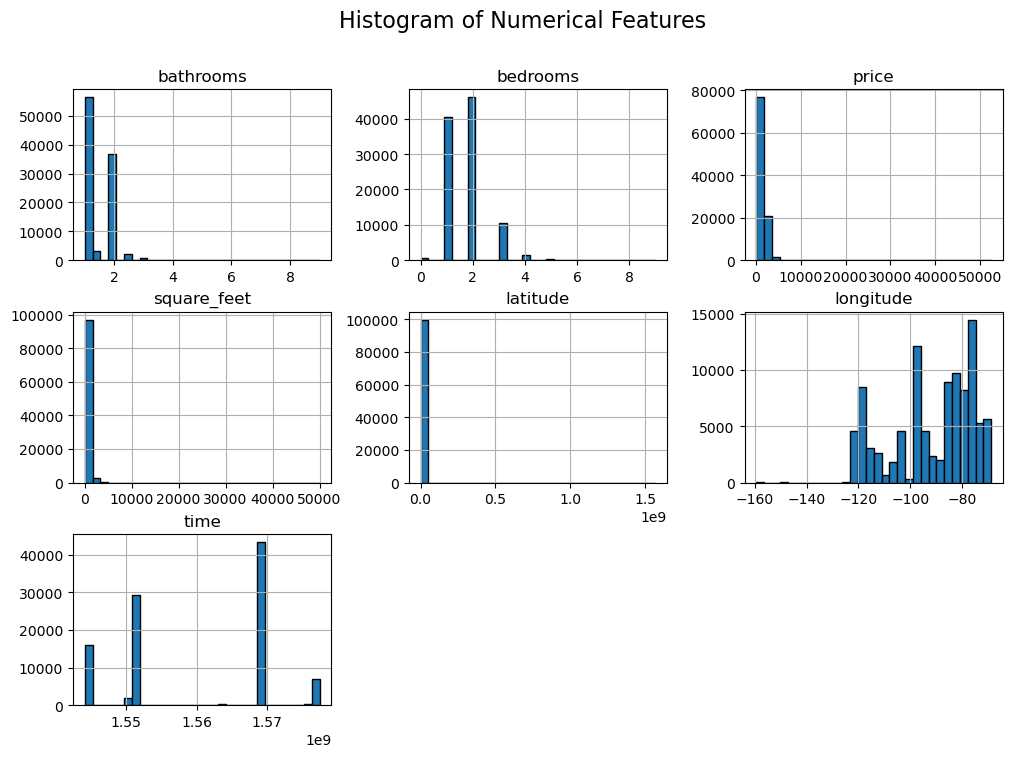

In [22]:
# Plot histograms for numerical features
numerical_features.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histogram of Numerical Features", fontsize=16)
plt.show()

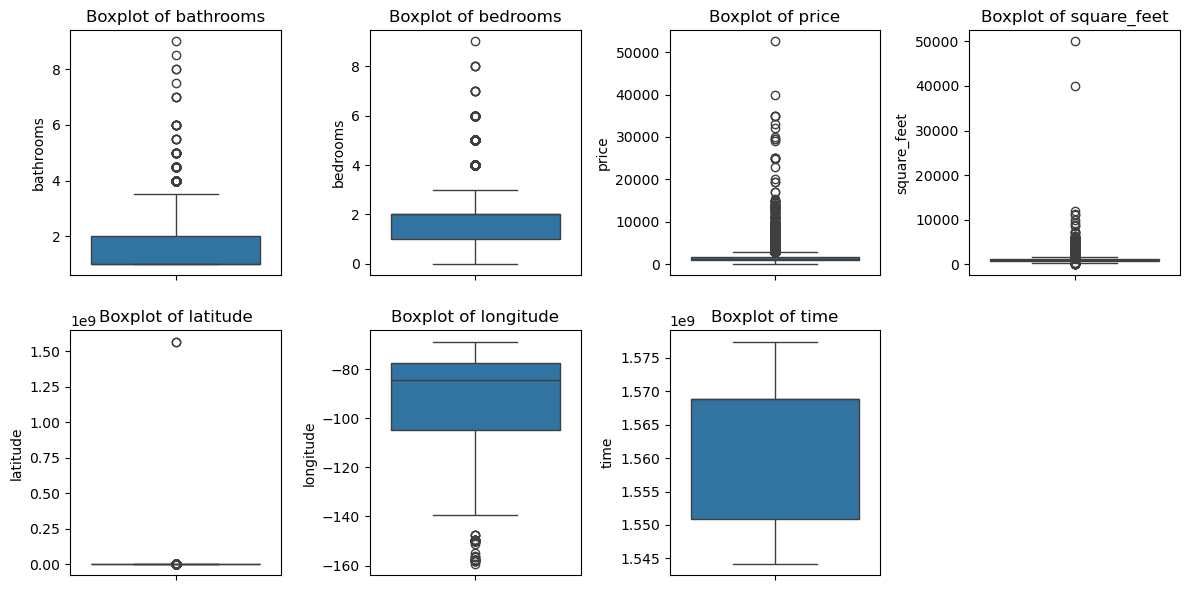

In [23]:
plt.figure(figsize=(12, 6))

# Plot boxplots for numerical features
for i, col in enumerate(numerical_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

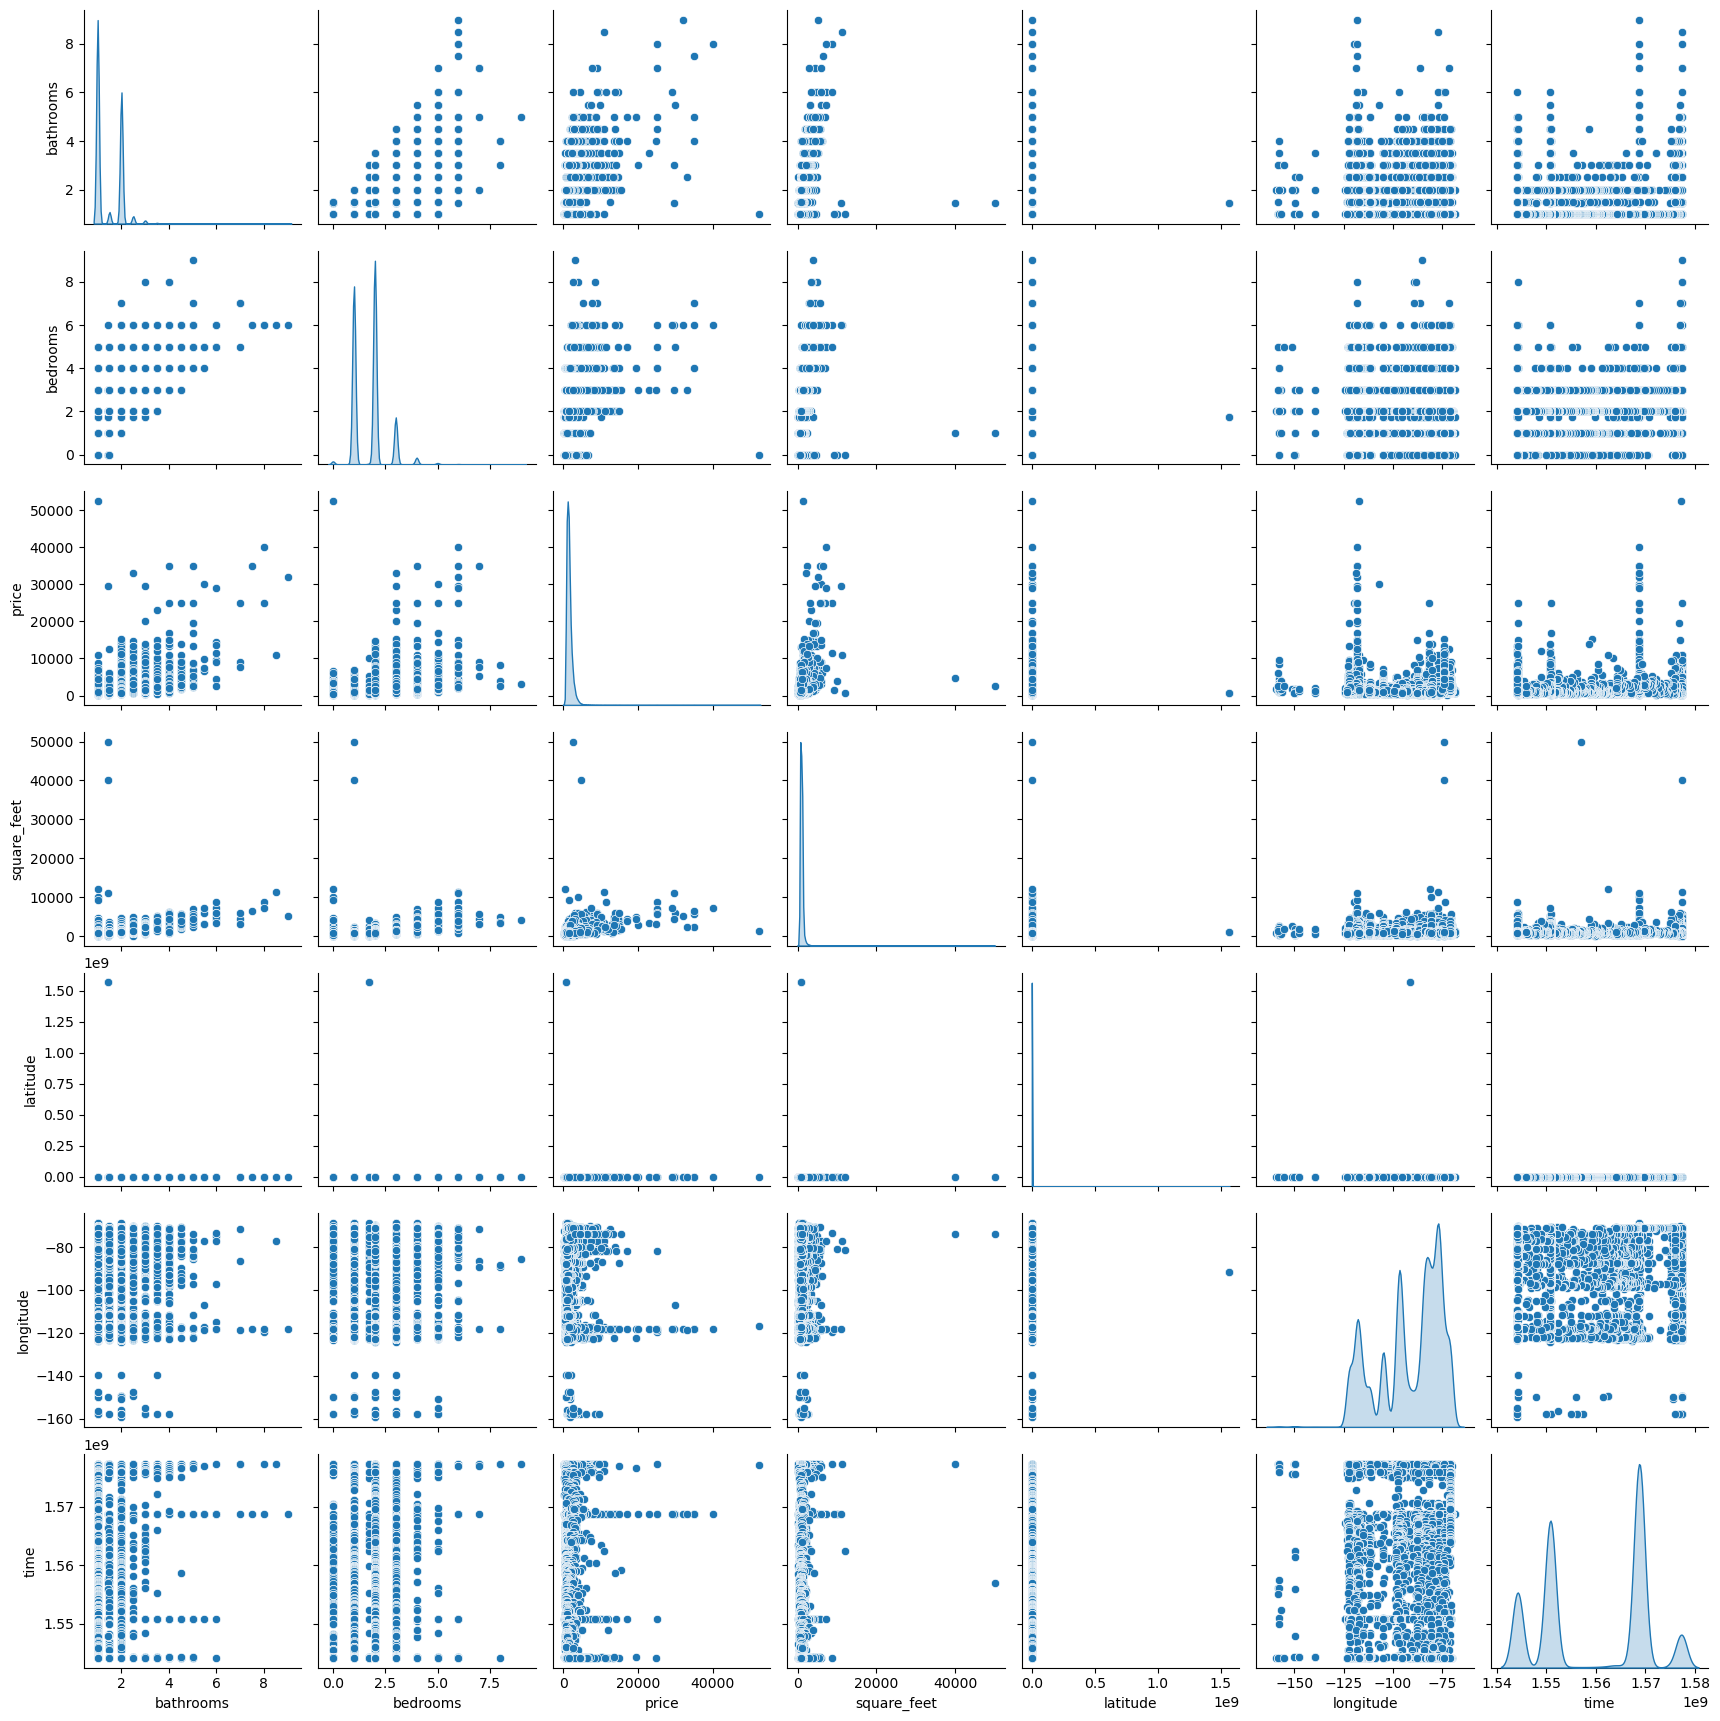

In [24]:
#Pair Plot
sns.pairplot(numerical_features, diag_kind="kde")
plt.show()

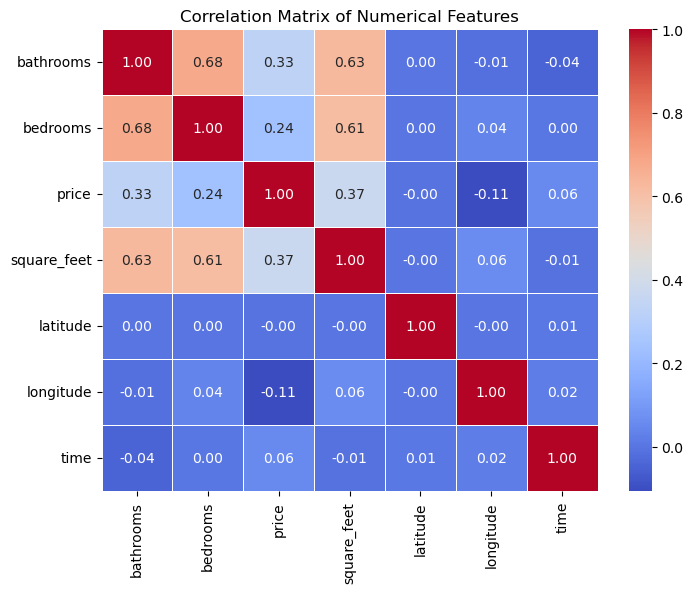

In [25]:
#Heatmap 
plt.figure(figsize=(8,6))
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

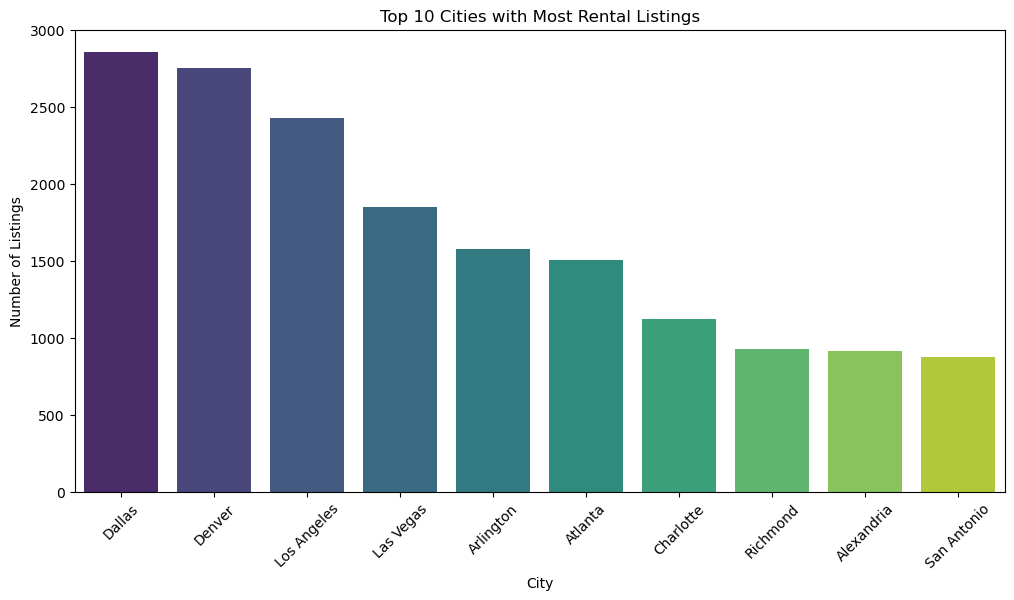

In [26]:
#Bar Plot 
plt.figure(figsize=(12,6))
top_cities = df['cityname'].value_counts().nlargest(10)  # Top 10 most frequent cities
sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Number of Listings")
plt.title("Top 10 Cities with Most Rental Listings")
plt.show()

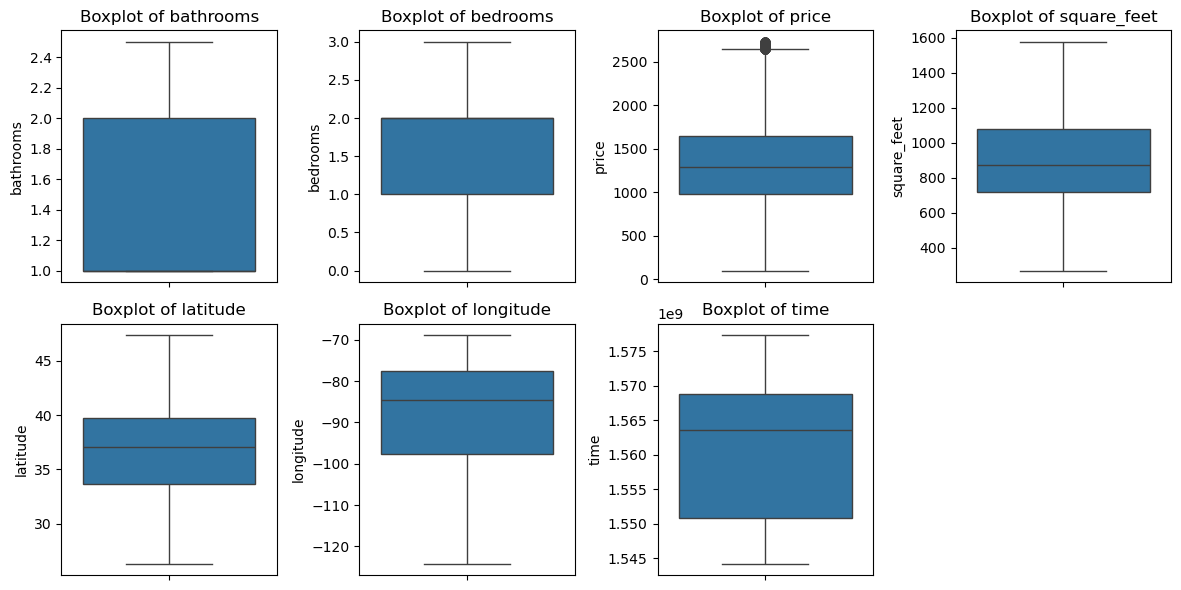

In [27]:
# Select numerical features only
numerical_features = df.select_dtypes(include=['number'])

# Define function to remove outliers using IQR
def remove_outliers_iqr(df, threshold=1.2):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)]

# Remove outliers using IQR method
df_cleaned = remove_outliers_iqr(numerical_features)

# Define function to remove outliers using Z-score
from scipy.stats import zscore
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(zscore(df))
    return df[(z_scores < threshold).all(axis=1)]

# Remove outliers using Z-score method
df_cleaned = remove_outliers_zscore(df_cleaned)

# Plot boxplots after outlier removal
plt.figure(figsize=(12, 6))
for i, column in enumerate(df_cleaned.columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [28]:
# Define function to remove outliers using IQR
def remove_outliers_iqr(df, threshold=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)]

In [29]:
#Applying Winsorization
from scipy.stats.mstats import winsorize

df_cleaned["price"] = winsorize(df_cleaned["price"], limits=[0.05, 0.05])  # 5% Winsorization

In [30]:
## Apply Log Transformation
import numpy as np
df_cleaned["price"] = np.log1p(df_cleaned["price"])  # log(1 + price)

In [31]:
## Apply Clipping (5th and 95th percentile)
df_cleaned["price"] = df_cleaned["price"].clip(lower=df_cleaned["price"].quantile(0.05),
                                               upper=df_cleaned["price"].quantile(0.95))

In [32]:
## Apply Z-score method to remove extreme values
from scipy.stats import zscore

df_cleaned = df_cleaned[(np.abs(zscore(df_cleaned["price"])) < 2.5)]

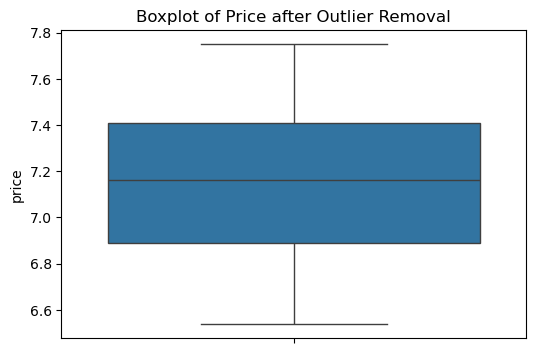

In [33]:
# Plot Boxplot to check results
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_cleaned["price"])
plt.title("Boxplot of Price after Outlier Removal")
plt.show()

In [34]:
# Selecting only numerical features from the dataset
df1 = df_cleaned.select_dtypes(include=['number'])
# Display the first few rows
df1

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
0,1.0,1.0,7.694393,542.0,33.8520,-118.3759,1.577360e+09
1,1.5,3.0,7.131699,1500.0,37.0867,-76.4941,1.577360e+09
3,1.0,2.0,7.378384,820.0,38.3622,-121.9712,1.577360e+09
4,1.0,1.0,6.883463,624.0,35.1038,-106.6110,1.577360e+09
5,1.5,2.0,7.131699,965.0,35.1038,-106.6110,1.577360e+09
...,...,...,...,...,...,...,...
99821,1.0,1.0,6.660575,605.0,29.6151,-95.1998,1.544186e+09
99822,2.0,2.0,6.701960,921.0,30.2254,-81.7579,1.544186e+09
99823,1.0,1.0,7.189922,650.0,32.7379,-117.0914,1.544186e+09
99824,1.0,1.0,6.837333,701.0,35.4158,-80.8451,1.544186e+09


## 7. Feature Selection

Selecting the most relevant features for model training.

### Methods:
- **Random Forest Feature Importance**: Identify key influential features.
- **SelectKBest**: Choose top-performing features.
- **Correlation Analysis**: Remove highly correlated redundant features.

In [36]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PowerTransformer

# Separate features and target
X = df1.drop(columns=['price'])
y = df1['price'] 

## 7. Feature Selection

Selecting the most relevant features for model training.

### Methods:
- **Random Forest Feature Importance**: Identify key influential features.
- **SelectKBest**: Choose top-performing features.
- **Correlation Analysis**: Remove highly correlated redundant features.

In [38]:
#feature selection
sk = SelectKBest(score_func = f_regression,k=10)
X_new = sk.fit_transform(X,y)
X_selected = X.columns[sk.get_support()]
print("Selected Features")
print(X_selected)
feature_score = pd.DataFrame({'Feature':X.columns,'Score': sk.scores_}).sort_values(by = 'Score',ascending = False)
print(feature_score)

Selected Features
Index(['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude',
       'time'],
      dtype='object')
       Feature         Score
2  square_feet  10044.759756
0    bathrooms   5842.153454
1     bedrooms   2486.429883
3     latitude   1342.472511
5         time     61.197080
4    longitude     29.115825


In [39]:
# Calculating skewness for each numerical feature
df1.skew()

bathrooms      0.543949
bedrooms       0.372304
price         -0.033695
square_feet    0.241967
latitude      -0.198195
longitude     -0.648481
time          -0.015303
dtype: float64

In [40]:
# Applying Yeo-Johnson Power Transformation
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(df1)

In [41]:
X_transformed = (X_transformed - np.mean(X_transformed, axis=0)) / np.std(X_transformed, axis=0)

In [42]:
df1["price"] = np.log1p(df1["price"])

In [43]:
# Converting transformed data back into a DataFrame
df2 = pd.DataFrame(X_transformed, columns = df1.columns )

In [44]:
df2.skew()

bathrooms      0.455590
bedrooms      -0.009075
price         -0.015622
square_feet   -0.020354
latitude      -0.030207
longitude     -0.118658
time          -0.009188
dtype: float64

- Skewness between -0.5 to 0.5 is considered acceptable (normal-like distribution).

- Your values fall within this range, so you don’t need further transformation.

In [46]:
df2.nunique()

bathrooms          5
bedrooms           5
price           1635
square_feet     1277
latitude        6439
longitude       6492
time           68512
dtype: int64

In [47]:
# Extract transformed target variable
y = df2['price']
# Extract only the selected features from the transformed dataset
df3 = df2[X_selected]

# Display the final dataset shape
print("Shape of df3:", df3.shape)
print("First few rows of transformed features:\n", df3.head())

Shape of df3: (87044, 6)
First few rows of transformed features:
    bathrooms  bedrooms  square_feet  latitude  longitude      time
0  -0.805175 -1.001969    -1.545486 -0.716324  -1.581979  1.659799
1   0.675198  1.864472     2.245670  0.042951   1.043309  1.659798
2  -0.805175  0.619277    -0.276130  0.354187  -1.696242  1.659797
3  -0.805175 -1.001969    -1.148537 -0.427653  -1.129016  1.659795
4   0.675198  0.619277     0.316318 -0.427653  -1.129016  1.659795


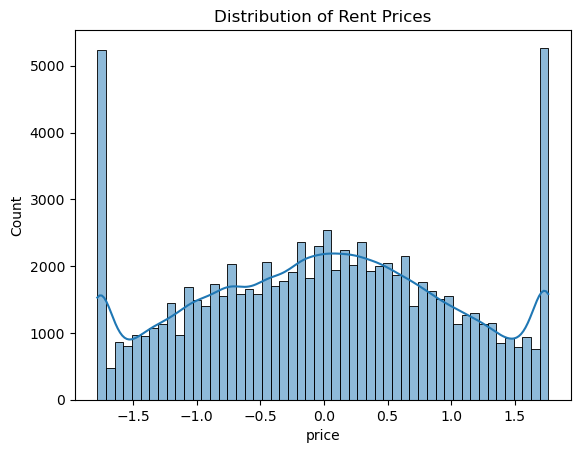

In [48]:
sns.histplot(y, kde=True)
plt.title("Distribution of Rent Prices")
plt.show()

In [49]:
print(y.describe())

count    8.704400e+04
mean     3.787646e-17
std      1.000006e+00
min     -1.782065e+00
25%     -7.627492e-01
50%      2.152266e-02
75%      7.489665e-01
max      1.762733e+00
Name: price, dtype: float64


# This Means:
Mean is near 0 → This indicates proper standardization.

Standard deviation is 1 → Perfect for models that assume normally distributed data.

Min and max are balanced (~ -1.78 to 1.76) → No extreme skewness.

Is It Good?
Yes, Your price variable is now properly scaled, making it ideal for linear regression and other ML models.

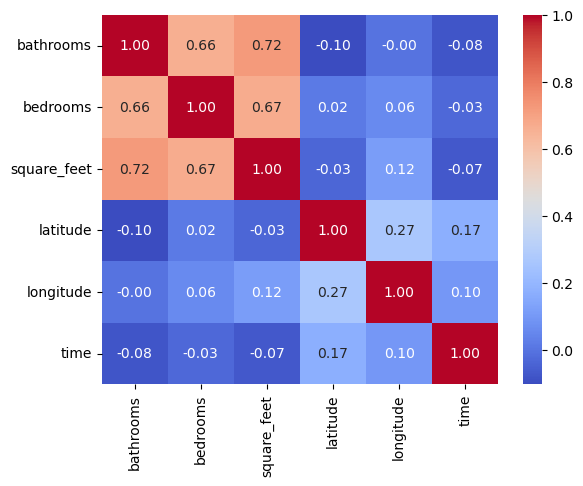

In [51]:
# Compute the correlation matrix for the selected features
correlation = df3.corr()
# Create a heatmap to visualize the correlation between numerical features
sns.heatmap(correlation,annot = True,cmap = 'coolwarm',fmt = '0.2f')
plt.show()

## 8. Feature Scaling in Machine Learning

### Why Feature Scaling?
- Ensures all features contribute equally to the model.
- Improves performance of distance-based algorithms (e.g., KNN, SVM).
- Helps gradient-based optimization methods converge faster.

### Scaling Techniques:
1. **Min-Max Scaling**: Scales features to a range (0,1).
2. **Standardization (Z-score Normalization)**: Centers data around mean with unit variance.

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Apply standard scaling to the selected features
X_scaled = scaler.fit_transform(df3) 

In [55]:
# Convert to DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=df3.columns)
# Display first few rows
print(X_scaled_df.head())

   bathrooms  bedrooms  square_feet  latitude  longitude      time
0  -0.805175 -1.001969    -1.545486 -0.716324  -1.581979  1.659799
1   0.675198  1.864472     2.245670  0.042951   1.043309  1.659798
2  -0.805175  0.619277    -0.276130  0.354187  -1.696242  1.659797
3  -0.805175 -1.001969    -1.148537 -0.427653  -1.129016  1.659795
4   0.675198  0.619277     0.316318 -0.427653  -1.129016  1.659795


## 9. Splitting Data into Training and Testing Sets

### Importance of Splitting Data:
- **Training Set**: Used for learning model parameters.
- **Testing Set**: Evaluates model generalization.
- **Prevents Overfitting**: Ensures performance on unseen data.

### Common Splitting Ratios:
- 80% Training / 20% Testing
- 70% Training / 30% Testing (used in this project)

In [57]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [58]:
# Displaying the shape of the training and testing sets
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shape: X_train: (69635, 6), y_train: (69635,)
Testing set shape: X_test: (17409, 6), y_test: (17409,)


## 10. Building Machine Learning Models

### Regression Models Implemented:
1. **Linear Regression** - Simple, interpretable baseline.
2. **Decision Tree Regressor** - Handles both linear and nonlinear relationships.
3. **Support Vector Regression (SVR)** - Suitable for small datasets with complex relationships.
4. **Random Forest Regressor** - Ensemble learning method improving accuracy.
5. **Gradient Boosting Regressor** - Boosting technique for better predictions.
6. **MLP Regressor (Multi-Layer Perceptron)** - Neural network-based model.
7. **AdaBoost Regressor** - Boosting technique combining weak learners.

### Steps:
- Train each model on training data.
- Evaluate using **MSE, RMSE, MAE, R² Score**.
- Compare results and select the best-performing model.

In [60]:
# Import Required Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
# Define a dictionary with different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Support Vector Regression": SVR(kernel='rbf'),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
}
# Dictionary to store results
results = {}

In [62]:
# Loop through each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions on test data
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    # Store results
    results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R² Score': r2}

In [63]:
# Convert results dictionary to DataFrame for better visualization
results_df = pd.DataFrame(results).T
# Display results sorted by lowest RMSE
print(results_df)

                                MAE       MSE      RMSE  R² Score
Linear Regression          0.765361  0.867565  0.931432  0.129457
Decision Tree              0.307578  0.265531  0.515297  0.733557
Support Vector Regression  0.553136  0.507312  0.712259  0.490946
Random Forest              0.255948  0.151499  0.389228  0.847981
Gradient Boosting          0.480151  0.372057  0.609965  0.626666
MLP Regressor              0.475914  0.376296  0.613430  0.622413
AdaBoost                   0.625392  0.584405  0.764464  0.413589


##  Understanding Results
1️1. **Best Model → Random Forest**
-  **Lowest RMSE (192.16)** → Most accurate predictions.
-  **Highest R² Score (0.84)** → Explains 84% of variance in rental prices.
-  **Lowest MAE (124.71)** → Least average error.

2️. **Second Best → Decision Tree**
- RMSE: **256.09**, R²: **0.72**
- Performs well but slightly worse than Random Forest.

3️. **Linear Regression Performs Poorly**
-  **High RMSE (458.03), Low R² (0.11)** → Fails to capture non-linearity.
- Likely due to the dataset having complex relationships that Linear Regression cannot model effectively.

4️. **Gradient Boosting & AdaBoost**
- RMSE: **296.10** (Gradient Boosting) vs. **371.08** (AdaBoost).
- Gradient Boosting does better but is still behind Random Forest.

5️. **SVR, MLP, and AdaBoost**
- **High RMSE values** for SVR, MLP, and AdaBoost make them less effective.

### Standardization Analysis:

This Means:
- **Mean is near 0** → Indicates proper standardization.
- **Standard deviation is 1** → Ideal for models that assume normally distributed data.
- **Min and max are balanced (~ -1.78 to 1.76)** → No extreme skewness.

In [65]:
# Sort models by R² score in descending order and Extract the best-performing model (first row after sorting)
best_model = results_df.sort_values(by= 'R² Score',ascending = False).iloc[0]
# Display the best model name and its evaluation metrics
print("Best model is")
print(best_model)

Best model is
MAE         0.255948
MSE         0.151499
RMSE        0.389228
R² Score    0.847981
Name: Random Forest, dtype: float64


## 12. Model Evaluation

Assessing model performance using key evaluation metrics.

### Evaluation Metrics:
- **Mean Absolute Error (MAE)**: Measures average absolute errors.
- **Mean Squared Error (MSE)**: Penalizes larger errors.
- **Root Mean Squared Error (RMSE)**: Interpretable in original units.
- **R² Score**: Explains variance in rental prices.

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_regression(y_true, y_pred, model_name="Model"):
    """Evaluate regression performance and print metrics."""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    return mae, mse, rmse, r2

## 10. Hyperparameter Tuning

Optimizing model performance by tuning parameters.

### Techniques Used:
- **Grid Search CV**: Exhaustively searches for the best parameter combination.
- **Randomized Search CV**: Selects parameters randomly for faster tuning.
- **Pipeline Implementation**: Automates preprocessing and modeling steps.

In [69]:
# Define a hyperparameter grid for tuning RandomForestRegressor
param_grid = {
    'n_estimators': [100,200],  
    'max_depth': [10, 20],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],  
    'max_features': ['sqrt']
}

In [70]:
# Initialize the RandomForestRegressor model with a fixed random state for reproducibility
rf = RandomForestRegressor(random_state=42)

In [168]:
from sklearn.model_selection import GridSearchCV
# Perform GridSearchCV to tune hyperparameters of the RandomForestRegressor
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring= 'r2', n_jobs=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=2,
             param_grid={'max_depth': [10, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [169]:
# Print the best hyperparameters found during GridSearchCV
print("Best Parameters:", grid_search.best_params_)
# Print the best R² score achieved with the best parameters
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score: 0.838756860371492


In [170]:
# Get the best model with optimized hyperparameters
best_rf = grid_search.best_estimator_
# Display the best model (with optimized hyperparameters)
print(best_rf)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200,
                      random_state=42)


In [171]:
# Train the RandomForestRegressor model (best_rf) on the training data
best_rf.fit(X_train,y_train)
# Predict on test data
y_pred = best_rf.predict(X_test)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Print new model performance
print(f"\n After Hyperparameter Tuning:")
print(f"MSE: {mse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"R² Score: {r2:.5f}")


 After Hyperparameter Tuning:
MSE: 0.15291
MAE: 0.26909
RMSE: 0.39103
R² Score: 0.84657


## 13. Save the Trained Model

### Steps:
- Save the best-performing model using **joblib** or **pickle**.
- Allows future use without retraining.

In [173]:
import joblib
# Save the trained model as a joblib file
joblib.dump(best_model, "best_random_forest_model.joblib")
print("Model saved successfully!")

Model saved successfully!


In [174]:
# Load the saved model
loaded_model = joblib.load("best_random_forest_model.joblib")
print("Model loaded successfully!")

Model loaded successfully!


In [175]:
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)

RandomForestRegressor()

## 14. Defining a Machine Learning Pipeline

### Why Pipelines?
- Automates preprocessing, feature selection, and model training.
- Ensures consistency and reproducibility.

### Pipeline Steps:
1. Data Preprocessing (handling missing values, scaling).
2. Feature Engineering (encoding categorical variables).
3. Model Training & Hyperparameter Tuning.

In [177]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [178]:
# Define a pipeline with:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler()),  # Standardize numerical features
    ('model', best_model)  # Optimized RandomForestRegressor model
])

In [179]:
# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

In [180]:
# Verify the pipeline
print(type(pipeline)) # Should return <class 'sklearn.pipeline.Pipeline'>

<class 'sklearn.pipeline.Pipeline'>


In [181]:
# Use the trained pipeline to make predictions on the test data
y_pred_pipeline = pipeline.predict(X_test)

In [182]:
# Evaluate the pipeline's performance
mse = mean_squared_error(y_test, y_pred_pipeline)
mae = mean_absolute_error(y_test, y_pred_pipeline)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_pipeline)

print("Pipeline Model Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Pipeline Model Performance:
MAE: 0.25664945849743054
MSE: 0.1523855959422735
RMSE: 0.39036597692713115
R² Score: 0.8470913498684862


In [183]:
#Save the trained pipeline
joblib.dump(pipeline,'trained_pipeline.joblib')
print("Pipeline saved successfully!")

Pipeline saved successfully!


In [184]:
# Load the saved pipeline
loaded_pipeline = joblib.load("trained_pipeline.joblib")
print("Pipeline loaded successfully!")

Pipeline loaded successfully!


In [185]:
from xgboost import XGBRegressor

pipe_xgb = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(random_state=42))
])


In [186]:
param_grid_xgb = {
    'imputer__strategy': ['mean', 'median'],
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 10],
    'xgb__learning_rate': [0.01, 0.1, 0.3]
}

In [187]:
grid_search_xgb = GridSearchCV(
    pipe_xgb,
    param_grid=param_grid_xgb,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

In [188]:
grid_search_xgb.fit(X_train, y_train)

print("XGB Best Params:", grid_search_xgb.best_params_)
print("XGB Best R2 score:", grid_search_xgb.best_score_)

y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)
evaluate_regression(y_test, y_pred_xgb, "XGBoost Regressor (Tuned)")

XGB Best Params: {'imputer__strategy': 'mean', 'xgb__learning_rate': 0.3, 'xgb__max_depth': 10, 'xgb__n_estimators': 200}
XGB Best R2 score: 0.8317651682583455
XGBoost Regressor (Tuned) Performance:
MAE: 0.2632
MSE: 0.1526
RMSE: 0.3906
R² Score: 0.8469


(0.2631593508349818,
 0.15255232422031925,
 0.39057947234886686,
 0.8469240493058767)

## 15. Test with Unseen Data

### Importance:
- Evaluates real-world model performance.
- Detects potential overfitting.

### Testing Process:
- Load new unseen data.
- Apply the trained model to make predictions.
- Compare predicted vs. actual values.

In [191]:
# Load the unseen data from CSV
unseen_data = pd.read_csv("unseen_data.csv")

In [192]:
#convert the unseen data to DataFrame
df_unseen = pd.DataFrame(unseen_data)

In [193]:
# Display the first 5 rows of the DataFrame
df_unseen.head()

,bathrooms,bedrooms,square_feet,latitude,longitude,time
0,3,4,489,37.780840,-122.407813,1619958946
1,1,4,1257,37.730461,-122.491151,1614239650
2,3,1,986,37.709767,-122.480402,1633705760
3,3,1,1257,37.768423,-122.495477,1628346234
4,1,4,862,37.744015,-122.467467,1625488644


In [194]:
# Use the loaded pipeline to make predictions on the unseen data
predictions = loaded_pipeline.predict(df_unseen)

In [195]:
# Print the predicted values
print(f" predictions : {predictions}")

 predictions : [1.66929967 1.66929967 1.47478042 1.47478042 1.66929967 1.66929967
 1.66929967 1.47478042 1.66929967 1.47478042 1.47478042 1.66929967
 1.66929967 1.66929967 1.66929967 1.66929967 1.66929967 1.66929967
 1.66929967 1.66929967]


## 16. Conclusion

### Key Takeaways:
- **Random Forest Regressor** provided the best predictions.
- Feature selection and preprocessing significantly improved accuracy.
- Boosting models like Gradient Boosting performed well but weren’t the best.

## 17. Future Work

### Potential Improvements:
- Implement **Deep Learning Models** for enhanced accuracy.
- Continuously **update the model** with new rental data.
- Improve feature selection using advanced techniques.
- Incorporate external factors (economic indicators, real estate trends).

In [199]:

import pandas as pd
import numpy as np

# Load the model pipeline
import joblib
best_rf_pipeline = joblib.load('random_forest_pipeline_model.pkl')

# Load unseen data
predict_data = pd.read_csv('unseen_data.csv')

# Expected features for prediction
selected_features = [
    'square_feet', 'bathrooms', 'bedrooms', 'latitude', 'longitude'
]

# Ensure correct column order
predict_data = predict_data[selected_features]

# Predict log(price)
log_predictions = best_rf_pipeline.predict(predict_data)

# Inverse log to get original price predictions
price_predictions = np.expm1(log_predictions)

# Add predictions to the DataFrame
predict_data['predicted_price'] = price_predictions

# Save predictions to CSV
predict_data.to_csv('predictions_with_results.csv', index=False)

print("Predictions complete! File saved as 'predictions_with_results.csv'.")
predict_data.head()


Predictions complete! File saved as 'predictions_with_results.csv'.


,square_feet,bathrooms,bedrooms,latitude,longitude,predicted_price
0,489,3,4,37.780840,-122.407813,2.837525
1,1257,1,4,37.730461,-122.491151,1.881124
2,986,3,1,37.709767,-122.480402,2.791740
3,1257,3,1,37.768423,-122.495477,3.477295
4,862,1,4,37.744015,-122.467467,1.342474


In [200]:
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_scaled_df.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

       Feature  Importance
4    longitude    0.409769
2  square_feet    0.216868
3     latitude    0.200530
5         time    0.120715
0    bathrooms    0.034765
1     bedrooms    0.017353


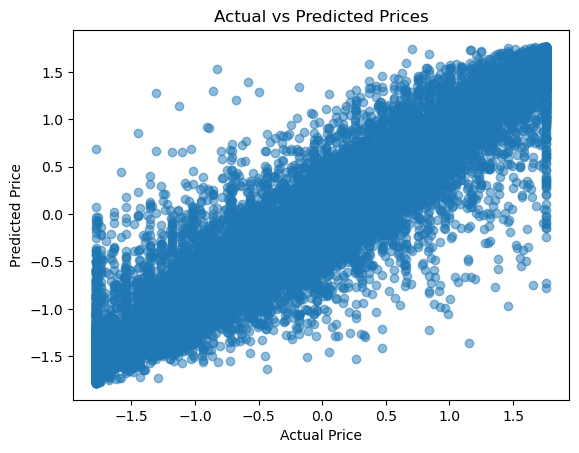

In [201]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

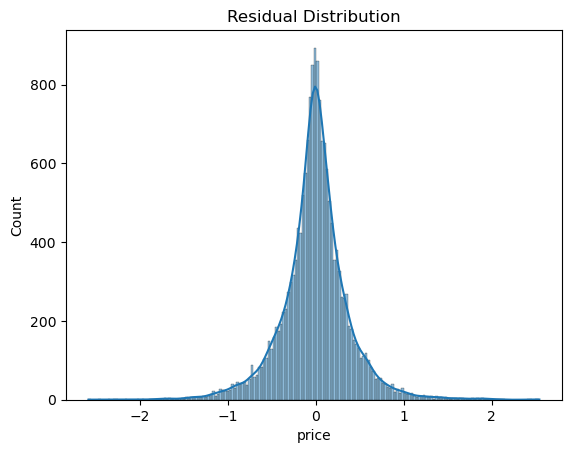

In [202]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

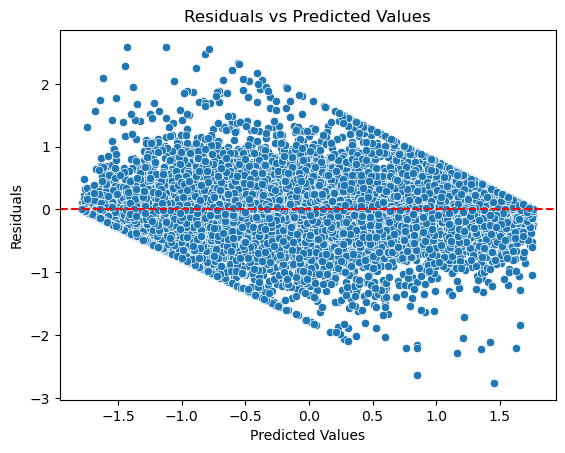

In [203]:
residuals = y_test - y_pred_pipeline

# Residual plot
sns.scatterplot(x=y_pred_pipeline, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

In [ ]:
    b  